In [1]:
import pandas as pd

df = pd.read_csv("../data/processed/airline_delay_clean.csv")


In [2]:
df.columns


Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'delay_rate', 'avg_delay_per_flight'],
      dtype='object')

In [3]:
monthly = (
    df
    .groupby("month", as_index=False)
    .agg(
        flights=("arr_flights", "sum"),
        delays=("arr_del15", "sum")
    )
)

monthly["delay_rate"] = monthly["delays"] / monthly["flights"]
monthly


,month,flights,delays,delay_rate
0,1,9954720.0,1930267.0,0.193905
1,2,9155599.0,1804212.0,0.197061
2,3,10526778.0,1949141.0,0.185160
3,4,9939940.0,1735261.0,0.174575
4,5,10058211.0,1862118.0,0.185134
5,6,10163259.0,2323140.0,0.228582
6,7,10662159.0,2367328.0,0.222031
7,8,10708061.0,2151167.0,0.200892
8,9,9839722.0,1434348.0,0.145771
9,10,10283955.0,1686899.0,0.164032


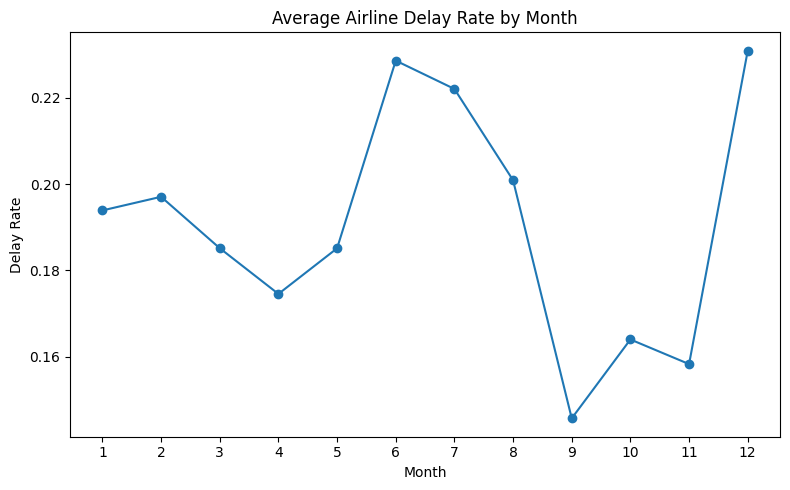

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(monthly["month"], monthly["delay_rate"], marker="o")
plt.xlabel("Month")
plt.ylabel("Delay Rate")
plt.title("Average Airline Delay Rate by Month")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


Delay rates increase during summer months and around year-end, suggesting seasonal congestion and weather effects.